In [2]:
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.neural_network import NARXNN

In [3]:
x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.01,
                                                   train_percentage=80)

In [6]:
y_train

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 8.38331139e-01],
       [ 8.01184360e-02],
       [-6.47112910e-01],
       [-7.20729114e-01],
       [ 5.84229780e-01],
       [-5.16230705e-01],
       [ 4.46765081e-01],
       [ 5.96216691e-01],
       [ 3.08323963e-01],
       [-1.01840924e-01],
       [-1.77714456e-01],
       [-7.43016237e-01],
       [-5.33237524e-01],
       [-2.47567786e-01],
       [-3.51056448e-01],
       [ 3.89527907e-03],
       [-1.89584143e-01],
       [ 6.48520496e-01],
       [ 1.19202550e-01],
       [ 9.05620909e-01],
       [ 1.09886887e-01],
       [-4.72920967e-01],
       [-4.49437763e-01],
       [-4.00081007e-01],
       [-5.53084686e-01],
       [-8.17673869e-01],
       [-1.02237506e+00],
       [ 4.74942931e-01],
       [-4.78365511e-01],
       [-1.90485989e-01],
       [ 5.26487527e-01],
       [-1.95554751e-01],
       [-8.30164123e-01],
       [-3.58023979e-01],
       [-3.08225140e-01],
       [ 5.41794025e-01],
       [-2.6

In [135]:
narx_net = NARXNN(ylag=2,
                  xlag=2,
                  loss_func='mse_loss',
                  optimizer='Adam',
                  epochs=200,
                  verbose=True,
                  optim_params={'betas': (0.9, 0.999), 'eps': 1e-05} # optional parameters of the optimizer
)

In [136]:
len(narx_net.regressor_code) # the number of features of the NARX net

4

In [137]:
class NARX(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(4, 10)
        self.lin2 = nn.Linear(10, 10)
        self.lin3 = nn.Linear(10, 1)
        self.tanh = nn.Tanh()

    def forward(self, xb):
        z = self.lin(xb)
        z = self.tanh(z)
        z = self.lin2(z)
        z = self.tanh(z)
        z = self.lin3(z)
        return z

In [138]:
narx_net.net = NARX() 

In [139]:
train_dl = narx_net.data_transform(x_train, y_train)
valid_dl = narx_net.data_transform(x_valid, y_valid)

In [140]:
narx_net.fit(train_dl, valid_dl)

12-26 15:29:38 - INFO - Train metrics: 0.16668745856685446 | Validation metrics: 0.17920156967158268
12-26 15:29:38 - INFO - Train metrics: 0.01819211611977048 | Validation metrics: 0.019944738276829622
12-26 15:29:38 - INFO - Train metrics: 0.02690105628978489 | Validation metrics: 0.030260798135640646
12-26 15:29:39 - INFO - Train metrics: 0.0018381833056230704 | Validation metrics: 0.001678232114169408
12-26 15:29:39 - INFO - Train metrics: 0.006835333270051127 | Validation metrics: 0.007713806810741773
12-26 15:29:39 - INFO - Train metrics: 0.0012598229974232857 | Validation metrics: 0.0011301993361834174
12-26 15:29:39 - INFO - Train metrics: 0.0021035933976801566 | Validation metrics: 0.0021289535327767483
12-26 15:29:39 - INFO - Train metrics: 0.001215399905396182 | Validation metrics: 0.0012831286388458778
12-26 15:29:39 - INFO - Train metrics: 0.0010031584494474128 | Validation metrics: 0.0010525146399323613
12-26 15:29:39 - INFO - Train metrics: 0.0009336541755472714 | Valida

In [141]:
ee, ex, extras, lam = narx_net.residuals(x_valid, y_valid, yhat)


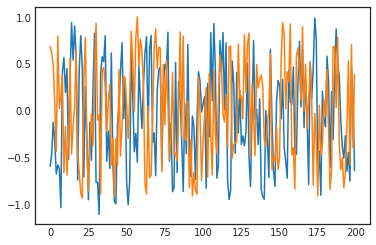

In [144]:
plt.plot(y_valid)

plt.plot(yhat)
#narx_net.plot_result(y_valid, yhat, ee, ex)